In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.integrate import quad
import seaborn as sns
from scipy import stats


plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = (10, 6)

# Miary tendencji centralnej i rozproszenia

## Miary tendencji centralnej

### Średnia (mean)
$$\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i$$

- Suma wszystkich wartości podzielona przez ich liczbę
- Wrażliwa na wartości odstające

### Mediana (median)
- Wartość środkowa posortowanych danych
- Odporna na wartości odstające
- 50. percentyl (Q2)

### Moda (mode)
- Wartość występująca najczęściej w zbiorze danych
- Może być więcej niż jedna moda lub w ogóle nie występować

---

## Miary rozproszenia – klasyczne

### Wariancja (variance)
$$s^2 = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2$$

- Średnia kwadratów odchyleń od średniej
- Jednostka: kwadrat jednostki oryginalnej
- $(n-1)$ = korekta Bessela (dla próby)

### Odchylenie standardowe (standard deviation)
$$s = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2}$$

- Pierwiastek z wariancji
- **Najczęściej używana miara rozproszenia**
- Ta sama jednostka co dane
- Interpretacja: "typowe odchylenie od średniej"

**Uwaga:** Obie miary są wrażliwe na wartości odstające

---

## Miary rozproszenia – statystyki pozycyjne

Oparte na posortowanych wartościach danych (*order statistics*)

### Rozstęp (range)
Różnica między wartością maksymalną i minimalną
$$\text{Range} = x_{\max} - x_{\min}$$

⚠️ **Problem:** Bardzo wrażliwy na wartości odstające → rzadko użyteczny

### Percentyle i kwantyle

- **Percentyl**: P-ty percentyl to wartość, poniżej której znajduje się co najmniej P% danych
- **Mediana to 50. percentyl**
- Percentyle są w zasadzie tym samym co **kwantyle**, z tą różnicą, że kwantyle indeksuje się ułamkami (np. kwantyl 0.8 to 80. percentyl)

### Rozstęp międzykwartylowy (IQR)
$$\text{IQR} = Q_3 - Q_1$$

gdzie:
- $Q_1$ = pierwszy kwartyl (25. percentyl)
- $Q_3$ = trzeci kwartyl (75. percentyl)

✅ **Zaleta:** Odporny na wartości odstające  
Opisuje rozproszenie środkowych 50% danych

## Eksploracja rozkładu danych

Miary takie jak średnia, mediana, percentyl podsumowuje dane w postaci **jednej liczby**, aby opisać ich położenie lub zmienność.

Równie użyteczne jest jednak **zbadanie ogólnego rozkładu danych**.

---

## Kluczowe pojęcia

**Wykres pudełkowy (Boxplot)**

* Wykres wprowadzony przez Johna Tukeya jako szybki sposób na wizualizację rozkładu danych.

* Jego synonim to *wykres pudełkowy z wąsami* (*box and whiskers plot*).

**Tabela liczebności (Frequency table)**

* Zestawienie liczby wartości numerycznych, które wpadają do określonych przedziałów (koszyków, *bins*).

**Histogram (Histogram)**

* Wykres przedstawiający tabelę liczebności, z przedziałami na osi X i liczebnością (lub proporcją) na osi Y. Choć wizualnie podobny, **histogramu nie należy mylić z wykresem słupkowym**.

**Wykres gęstości (Density plot)**

* Wygładzona wersja histogramu, często tworzona na podstawie **jądrowego estymatora gęstości** (*kernel density estimate*).

In [ ]:
import pandas as pd

In [ ]:
state = pd.read_csv("state.csv")
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [ ]:
state["Murder.Rate"].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

## Wykres pudełkowy (ang. boxplot)

**Pudełko:**
- Górna krawędź = Q3 (75. percentyl)
- Dolna krawędź = Q1 (25. percentyl)
- Linia w środku = **mediana** (Q2)
- Wysokość pudełka = **IQR** (Interquartile Range = Q3 - Q1)

**Wąsy:**
- Dolny: Q1 - 1.5 × IQR
- Górny: Q3 + 1.5 × IQR
- Pokazują zakres głównej części danych

**Punkty poza wąsami:** wartości odstające (**outliers**)


Text(0, 0.5, 'Murder rate')

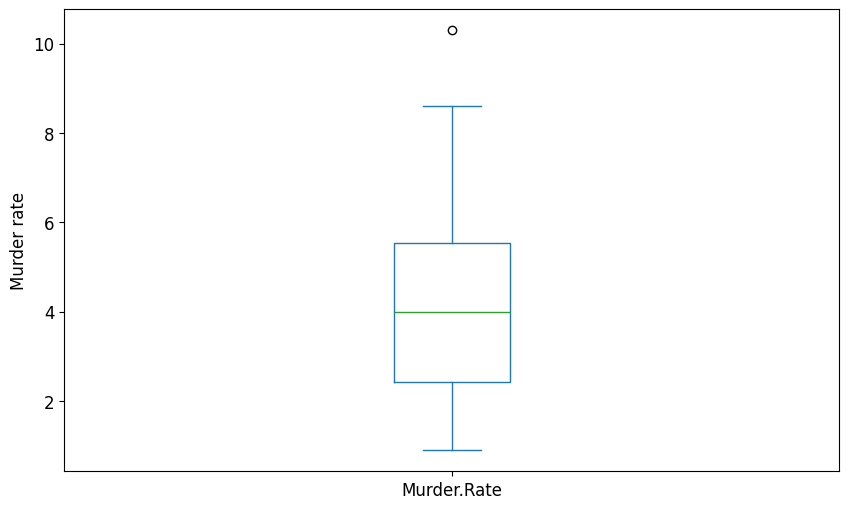

In [ ]:
ax = (state["Murder.Rate"]).plot.box()
ax.set_ylabel("Murder rate")

Text(0, 0.5, 'Population (millions)')

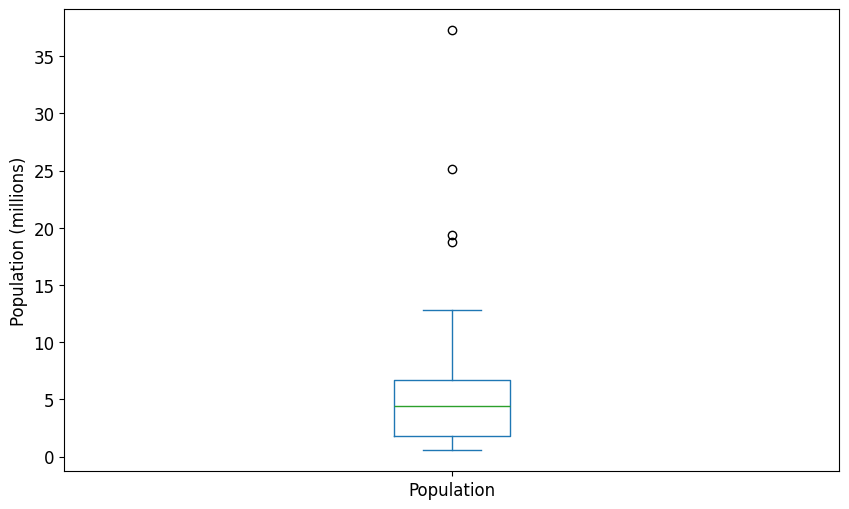

In [ ]:
ax = (state["Population"]/1_000_000).plot.box()
ax.set_ylabel("Population (millions)")

## Tablice częstości i histogramy

Tablica częstości dzieli zakres zmiennej na równe segmenty i pokazuje liczbę wartości w każdym przedziale.

**Ważne**:

- Uwzględniaj puste przedziały - to użyteczna informacja
- Eksperymentuj z szerokością przedziałów:
    - Zbyt duże → ukrywają ważne cechy rozkładu
    - Zbyt małe → tracisz szerszy obraz



**Różnica między metodami podsumowania**:

- *Percentyle/kwartyle* - równa liczność, różne rozmiary przedziałów
- *Tablice częstości* - równe rozmiary przedziałów, różna liczność

In [ ]:
binned_population = pd.cut(state["Population"], 10)
binned_population.value_counts(sort=False)

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
(33584923.0, 37253956.0]     1
Name: count, dtype: int64

## Histogram

**Histogram** = graficzna reprezentacja tablicy częstości
- Oś X: przedziały (bins)
- Oś Y: liczba obserwacji

**W pandas:**
```python
df.plot.hist(bins=20)  # bins = liczba przedziałów

Text(0, 0.5, 'Population (millions)')

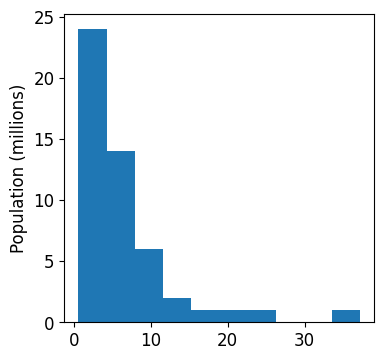

In [ ]:
ax = (state["Population"]/1_000_000).plot.hist(figsize=(4, 4))
ax.set_ylabel("Population (millions)")

## Seaborn

**Seaborn** = biblioteka do wizualizacji danych oparta na Matplotlib
- Wyższy poziom abstrakcji → prostszy kod
- Estetyczne wykresy "out of the box"
- Doskonała integracja z pandas DataFrame
- Automatyczne przetwarzanie danych (np. grupowanie)

---

## Histogram w Seaborn

### Jedna zmienna
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Wczytanie danych
titanic = sns.load_dataset('titanic')

# Histogram dla wieku
sns.histplot(data=titanic, x='age', bins=30, kde=True)
plt.title('Rozkład wieku pasażerów')
plt.show()

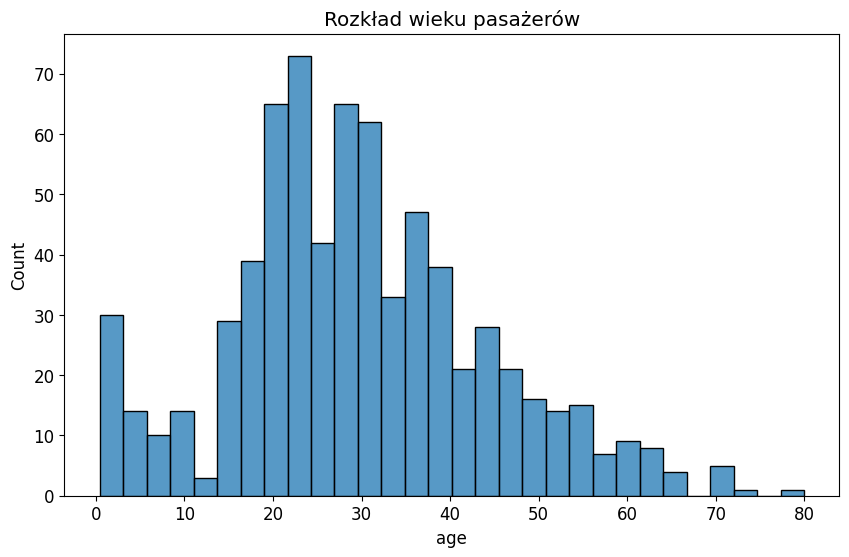

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Wczytanie danych
titanic = sns.load_dataset('titanic')

# Histogram dla wieku
sns.histplot(data=titanic, x='age', bins=30)
plt.title('Rozkład wieku pasażerów')
plt.show()

## **Wiele zmiennych**

## Parametr `hue` w Seaborn 🎨

### Co to jest `hue`?

**`hue`** = parametr do **automatycznego grupowania i kolorowania** danych według wartości zmiennej kategorycznej

- Pochodzi z angielskiego "hue" = odcień, barwa
- Automatycznie:
  - Dzieli dane na grupy
  - Przypisuje różne kolory każdej grupie
  - Tworzy legendę
  - Dostosowuje wykres do porównań

---

### Jak działa `hue`?
```python
# BEZ hue - wszystkie dane razem
sns.histplot(data=titanic, x='age')
# Wynik: Jeden histogram ze wszystkimi danymi

# Z hue - automatyczny podział na grupy
sns.histplot(data=titanic, x='age', hue='sex')
# Wynik: Dwa histogramy (male/female) w różnych kolorach

<Axes: xlabel='age', ylabel='Count'>

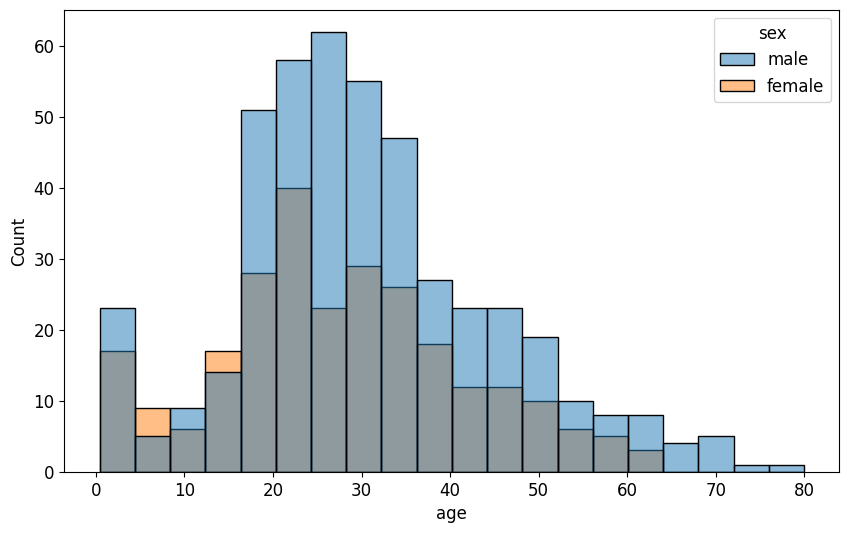

In [ ]:
# Z hue - automatyczny podział na grupy
sns.histplot(data=titanic, x="age", hue="sex")

## Boxplot w Seaborn

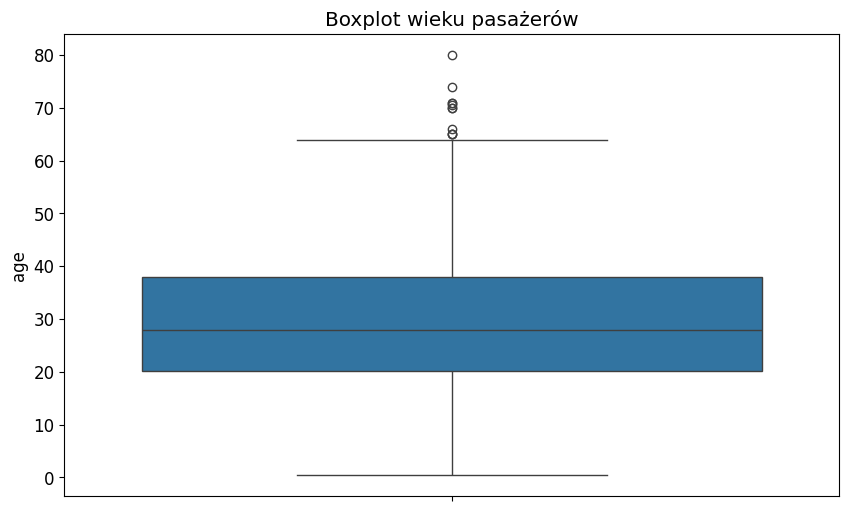

In [ ]:
# Prosty boxplot dla wieku
sns.boxplot(data=titanic, y='age')
plt.title('Boxplot wieku pasażerów')
plt.show()

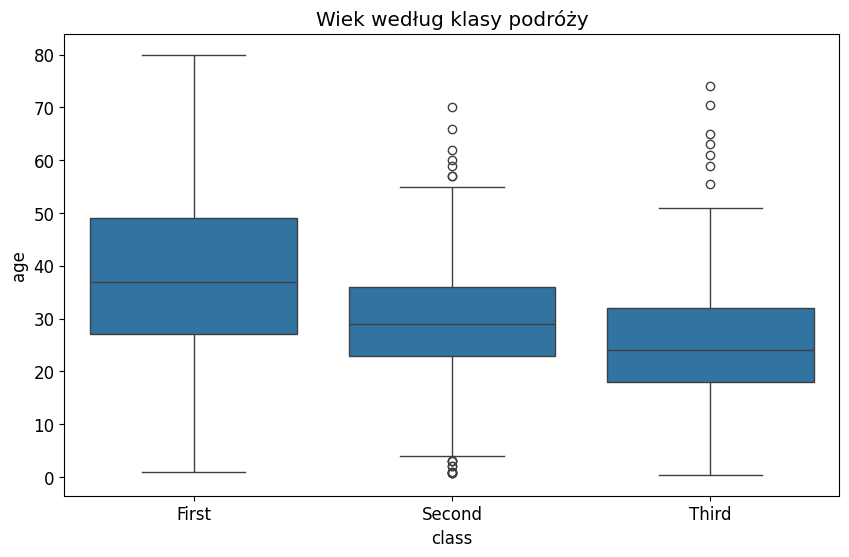

In [ ]:
# Porównanie wieku według klasy
sns.boxplot(data=titanic, x='class', y='age')
plt.title('Wiek według klasy podróży')
plt.show()

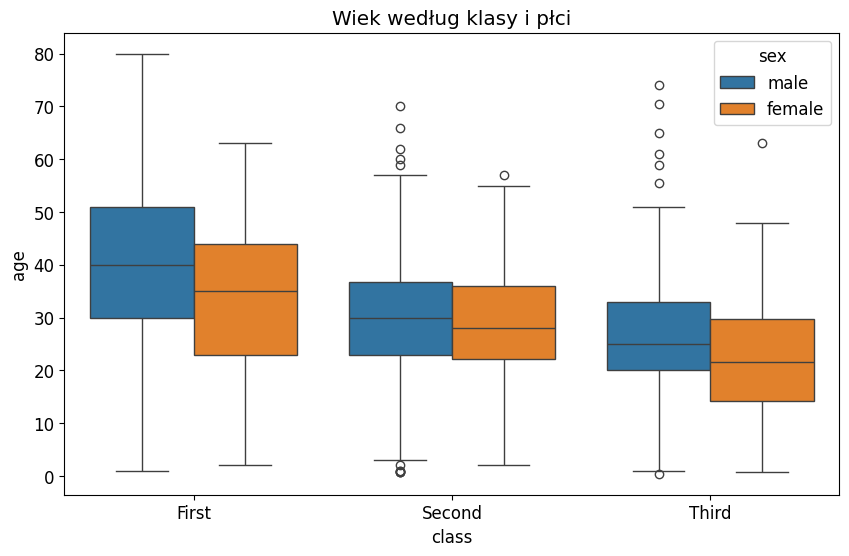

In [ ]:
# Z dodatkowym podziałem według płci
sns.boxplot(data=titanic, x='class', y='age', hue='sex')
plt.title('Wiek według klasy i płci')
plt.show()

## **Przewagi Seaborn**

1. **Automatyczne grupowanie** - parametr `hue` automatycznie tworzy podgrupy
2. **Jeden wiersz kodu** zamiast wielu pętli i filtrowania danych
3. **Spójny interfejs** - podobna składnia dla wszystkich wykresów
4. **Ładniejsze wykresy** domyślnie (palety kolorów, style)
5. **Integracja z DataFrame** - nie trzeba wyciągać kolumn ręcznie

## Wykres Gęstości (Density Plot)

* Wygładzony histogram pokazany jako ciągła linia
* Obliczany przez KDE (Kernel Density Estimate)

Kluczowa różnica: skala osi Y
| Wykres | Oś  Y|
| -------- | -------- |
| Histogram         | Liczba obserwacji (counts)   |
| Wykres gęstości   | Gęstość = proporcje   |

| Wykres gęstości = histogram wyrażony w **proporcjach** zamiast liczności



Text(0.5, 0, 'Murder Rate (per 100,000)')

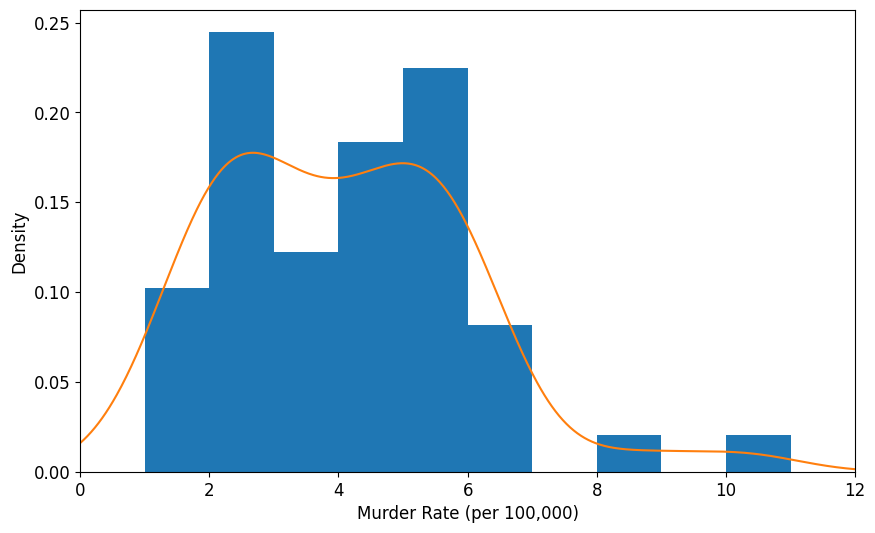

In [ ]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

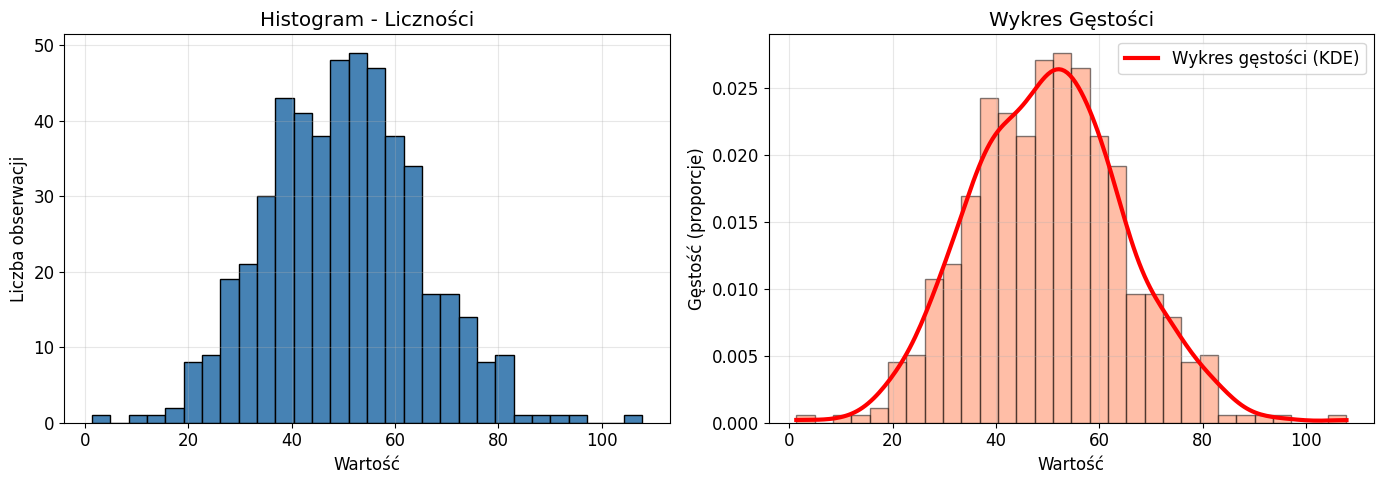

In [ ]:
# Dane
np.random.seed(42)
data = np.random.normal(loc=50, scale=15, size=500)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# LEWY: Histogram (counts)
axes[0].hist(data, bins=30, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Wartość')
axes[0].set_ylabel('Liczba obserwacji')
axes[0].set_title('Histogram - Liczności')
axes[0].grid(alpha=0.3)

# PRAWY: Wykres gęstości
axes[1].hist(data, bins=30, density=True, color='coral',
             alpha=0.5, edgecolor='black')
kde = stats.gaussian_kde(data)
x_range = np.linspace(data.min(), data.max(), 200)
axes[1].plot(x_range, kde(x_range), 'r-', linewidth=3,
             label='Wykres gęstości (KDE)')
axes[1].set_xlabel('Wartość')
axes[1].set_ylabel('Gęstość (proporcje)')
axes[1].set_title('Wykres Gęstości')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Korelacja między zmiennymi

## Współczynnik korelacji Pearsona

### Definicja
Współczynnik korelacji **r** mierzy **siłę i kierunek liniowej zależności** między dwiema zmiennymi.

### Wzór
$$r = \frac{1}{n-1}\sum_{i=1}^{n} \frac{(x_i - \bar{x})}{s_x} \cdot \frac{(y_i - \bar{y})}{s_y}$$

lub równoważnie:

$$r = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{(n-1) \cdot s_x \cdot s_y}$$

gdzie:
- $\bar{x}$, $\bar{y}$ = średnie dla zmiennych x i y
- $s_x$, $s_y$ = odchylenia standardowe dla x i y
- $n$ = liczba obserwacji

### Kluczowe właściwości
- **Zakres wartości:** $-1 \leq r \leq 1$
- **Bezwymiarowy** - nie zależy od jednostek pomiarowych
- Standaryzuje zmienne (dzieli przez odchylenia standardowe)

---

## Interpretacja współczynnika korelacji

### Wartości współczynnika r

| Wartość r | Interpretacja |
|-----------|---------------|
| $r = 1$ | Idealna korelacja dodatnia |
| $0.7 < r < 1$ | Silna korelacja dodatnia |
| $0.3 < r < 0.7$ | Umiarkowana korelacja dodatnia |
| $-0.3 < r < 0.3$ | Słaba lub brak korelacji |
| $-0.7 < r < -0.3$ | Umiarkowana korelacja ujemna |
| $-1 < r < -0.7$ | Silna korelacja ujemna |
| $r = -1$ | Idealna korelacja ujemna |

### Kierunek zależności
- **r > 0**: korelacja dodatnia (gdy x rośnie, y rośnie)
- **r < 0**: korelacja ujemna (gdy x rośnie, y maleje)
- **r ≈ 0**: brak zależności liniowej

⚠️ **Ważne:** Współczynnik Pearsona mierzy **tylko zależności liniowe**!

---

## Ograniczenia i macierz korelacji

### Ograniczenia korelacji Pearsona

**Korelacja ≠ Zależność**
- Współczynnik r = 0 nie oznacza braku zależności
- Może istnieć **silna zależność nieliniowa** (np. kwadratowa, wykładnicza)
- Przykład: zależność paraboliczna może mieć r ≈ 0

**Korelacja ≠ Przyczynowość**
- Wysoka korelacja nie oznacza związku przyczynowo-skutkowego
- Może być efektem trzeciej zmiennej (zmienna zakłócająca)

### Macierz korelacji

Dla wielu zmiennych tworzymy **macierz korelacji** - tabelę wszystkich par korelacji:

$$
\mathbf{R} = \begin{bmatrix}
1 & r_{12} & r_{13} & \cdots \\
r_{21} & 1 & r_{23} & \cdots \\
r_{31} & r_{32} & 1 & \cdots \\
\vdots & \vdots & \vdots & \ddots
\end{bmatrix}
$$

**Właściwości:**
- Symetryczna: $r_{ij} = r_{ji}$
- Diagonal = 1 (korelacja zmiennej ze sobą)
- Wizualizacja: heatmapa (mapa ciepła)

**Zastosowanie:** Szybka analiza zależności między wieloma zmiennymi jednocześnie

## Wykresy macierzowe

* Biblioteka `seaborn` umożliwia szybką analizę eksploracyjną danych uwzględniającą relacje i indywidualne rozkłady za pomocą wykresu macierzowego.
* Wykres taki zawiera histogram ukazujący indywidualny rozkład, a także wykres punktowy prezentujący wspólną zależność cech

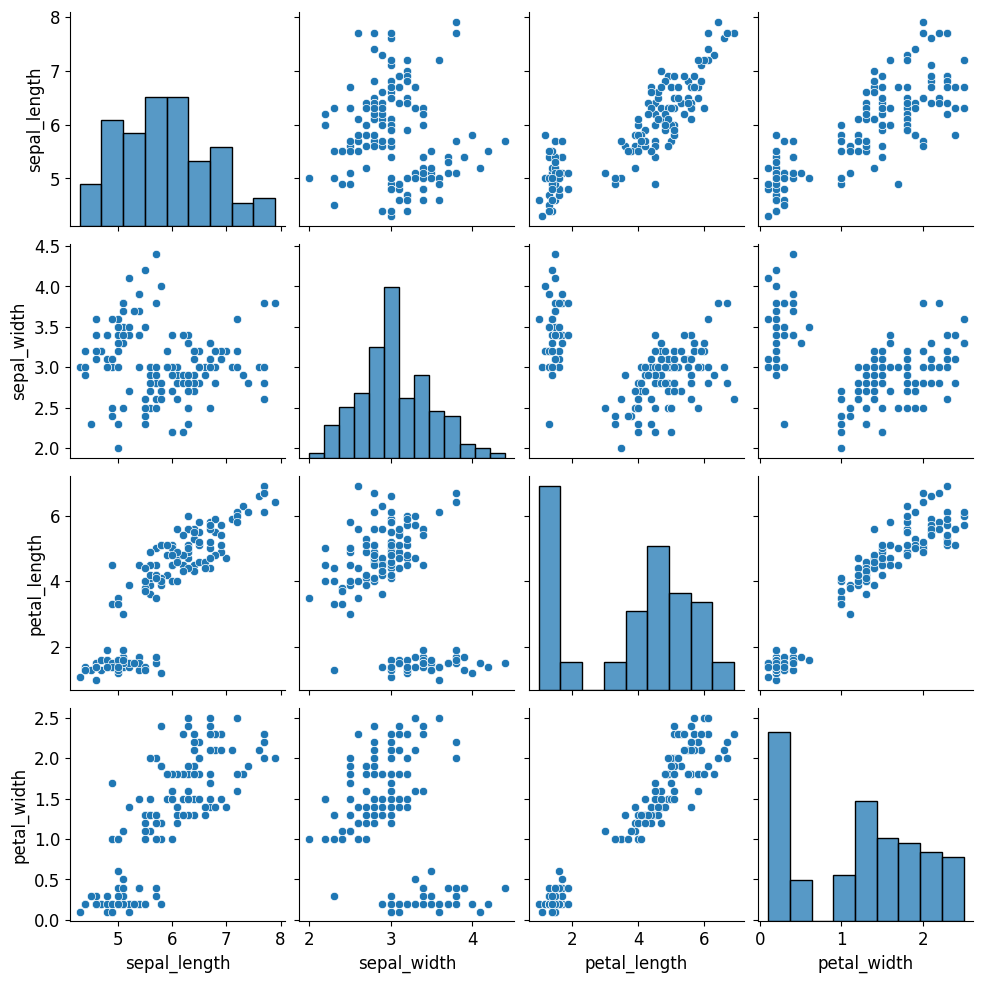

In [ ]:
# Wczytuje zestaw danych Iris za pomocą funkcji load_dataset()
data = sns.load_dataset("iris")
# Tworzy wykres macierzowy
sns.pairplot(data)
# Wyświetla rysunek
plt.show()

## Mapy cieplne
Mapa cieplna stanowi siatkę dwuwymiarową.

* Każda komórka siatki zawiera wartość macierzy.

* Funkcja heatmap() umożliwia także opisywanie każdej komórki:

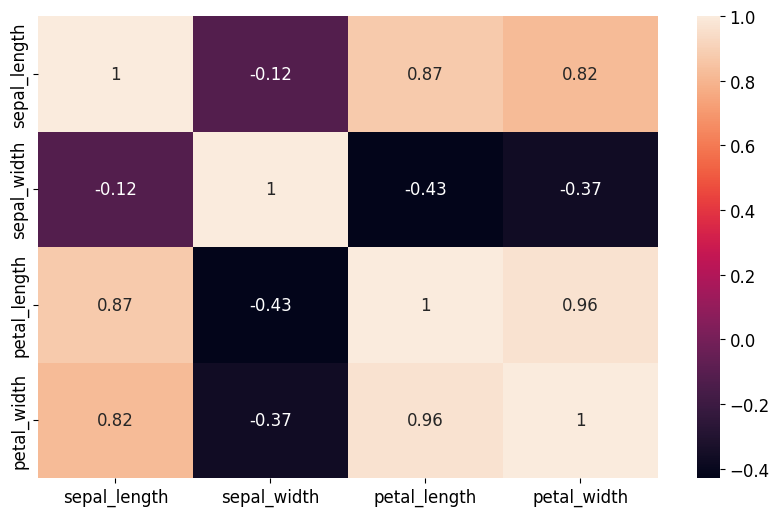

In [ ]:
# Wczytuje zestaw danych Iris
data = sns.load_dataset("iris")

# Wybiera tylko kolumny numeryczne do obliczenia korelacji
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Wyszukuje korelację
cor_matrix = numeric_data.corr()

# Tworzy mapę cieplną
sns.heatmap(cor_matrix, annot=True)

# Wyświetla rysunek
plt.show()

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.integrate import quad
import seaborn as sns
from scipy import stats
import matplotlib.dates as mdt

plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = (10, 6)

data = pd.read_csv("train.csv")
print(data.head())

data.info()


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

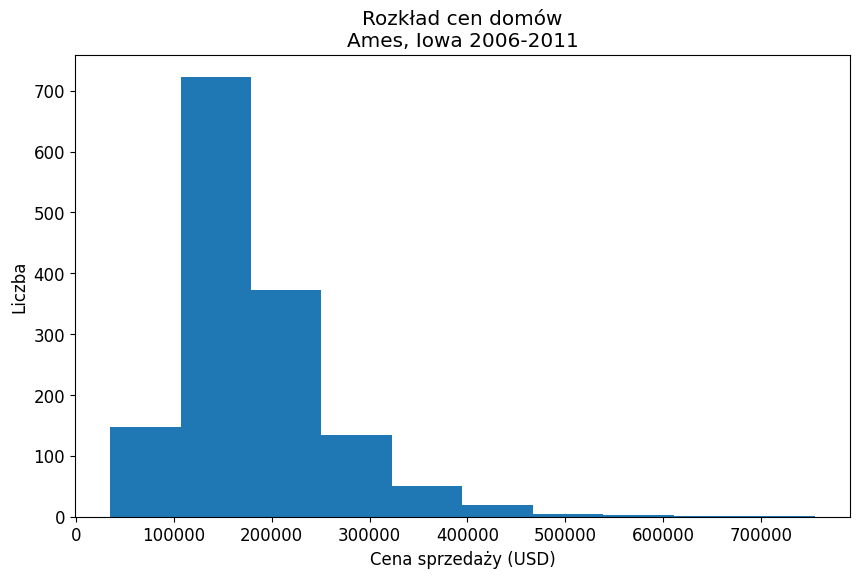

In [66]:
plt.hist(data['SalePrice'])

plt.xlabel('Cena sprzedaży (USD)')
plt.ylabel('Liczba')
plt.title('Rozkład cen domów\nAmes, Iowa 2006-2011')
plt.show()

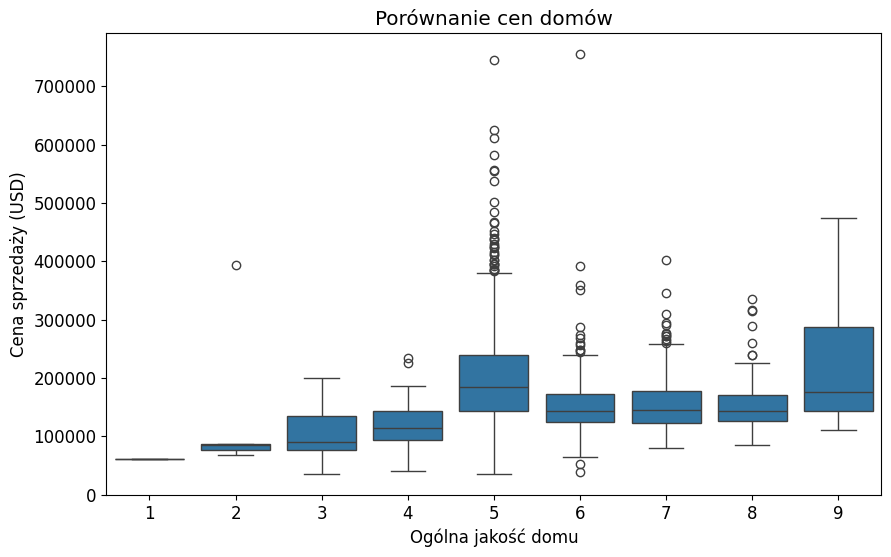

In [65]:
sns.boxplot(data=data, x='OverallCond', y='SalePrice')

plt.xlabel('Ogólna jakość domu')
plt.ylabel('Cena sprzedaży (USD)')
plt.title('Porównanie cen domów')
plt.show()

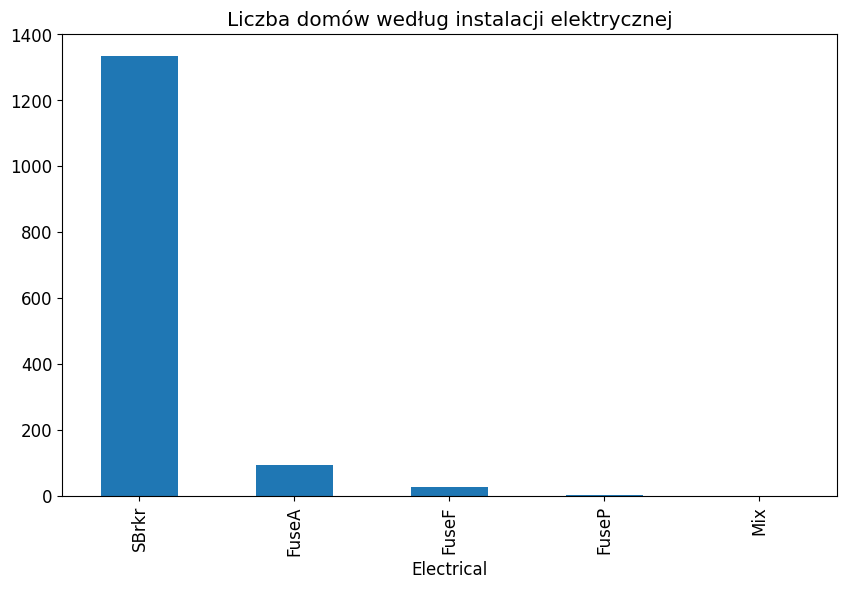

In [64]:
elek = data['Electrical'].value_counts()
elek.plot.bar()

plt.title('Liczba domów według instalacji elektrycznej')
plt.show()

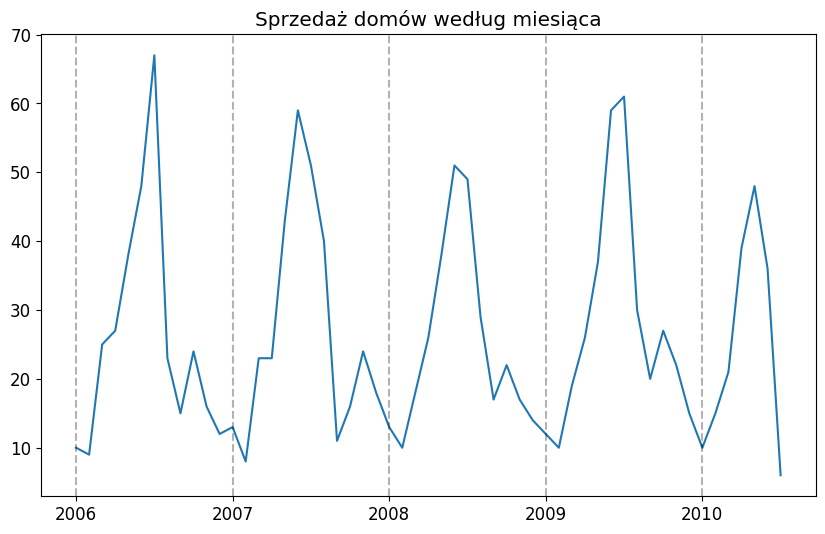

In [63]:
data['YrMoSold'] = data['YrSold'].astype(str) + '-' + data['MoSold'].astype(str).str.zfill(2)
miesiace = data.groupby('YrMoSold')['SalePrice'].size().sort_index()
miesiace.head()
plt.plot(miesiace.index, miesiace.values)

start_rok = miesiace[miesiace.index.str[-2:]  == '01']
for sr in start_rok.index:
    plt.axvline(x=sr, color='black', linestyle='--', alpha=0.3)

plt.title('Sprzedaż domów według miesiąca')
plt.xticks(start_rok.index, [sr[:4] for sr in start_rok.index])


plt.show()

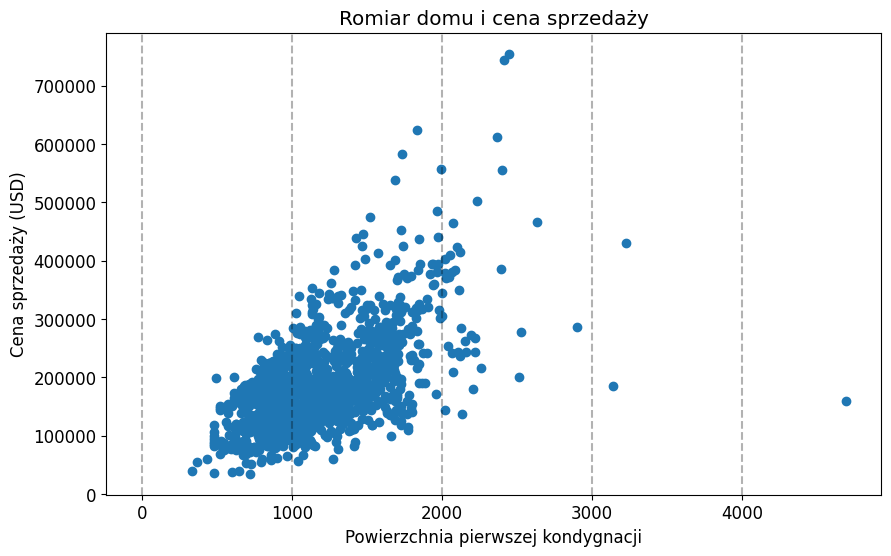

In [62]:
plt.scatter(x=data['1stFlrSF'], y=data['SalePrice'])

for x in range(0, int(data['1stFlrSF'].max()), 1000):
  plt.axvline(x, color='black', linestyle='--', alpha=0.3)

plt.xlabel('Powierzchnia pierwszej kondygnacji')
plt.ylabel('Cena sprzedaży (USD)')
plt.title('Romiar domu i cena sprzedaży')
plt.show()